In [1]:
from recommender import Recommender
import numpy as np
import os
import json
import pandas as pd

rec = Recommender("movies_clean.csv", "reviews_clean.csv")

In [2]:
# Since fitting FunkSVD takes a while, use a boolean to decide
# whether to run the fit or restore previous fit results
load_from_checkpoint = False

if load_from_checkpoint:
    # load results from current directory
    rec.load_results("./")
    
    print("Successfully loaded results!")
else:
    # fit recommender
    rec.fit()
    
    # after fit, store results for being able to load them later

    np.save("u_mat.npy", rec.u_mat)
    np.save("i_mat.npy", rec.i_mat)

    res_dict = {
        "iterations": 100,
        "latent_feats": 12,
        "train_size": 8000,
        "learning_rate": 0.001,
        "test_size": 2000,
        "order_by": "date",
        "seed": None,
        "u_mat": os.path.abspath("./u_mat.npy"),
        "i_mat": os.path.abspath("./i_mat.npy")
    }

    with open("results.json", "w") as jsonfile:
        json.dump(res_dict, jsonfile, indent=4)

Optimization
Iterations | Mean Squared Error
1 		 18.456505288616906
2 		 12.871041198611424
3 		 10.364226409603848
4 		 8.908963509128398
5 		 7.909132363436191
6 		 7.151408343284905
7 		 6.544217187936859
8 		 6.040618322596588
9 		 5.612958397536721
10 		 5.2433290563629145
11 		 4.9193815456982
12 		 4.63222375253821
13 		 4.375245416148431
14 		 4.143408867577562
15 		 3.9327961619423024
16 		 3.740307692122408
17 		 3.5634550405178196
18 		 3.4002147752908543
19 		 3.248922892028383
20 		 3.1081970771546
21 		 2.9768784583091255
22 		 2.8539872898697696
23 		 2.7386887915600986
24 		 2.630266508787109
25 		 2.528101327401185
26 		 2.431654793449296
27 		 2.3404557467329536
28 		 2.2540895297030756
29 		 2.1721892148030557
30 		 2.0944284259870196
31 		 2.020515428365062
32 		 1.9501882335291711
33 		 1.8832105237768573
34 		 1.8193682408554728
35 		 1.7584667173440558
36 		 1.700328253809814
37 		 1.64479006423085
38 		 1.5917025272190917
39 		 1.5409276923341937
40 		 1.492338

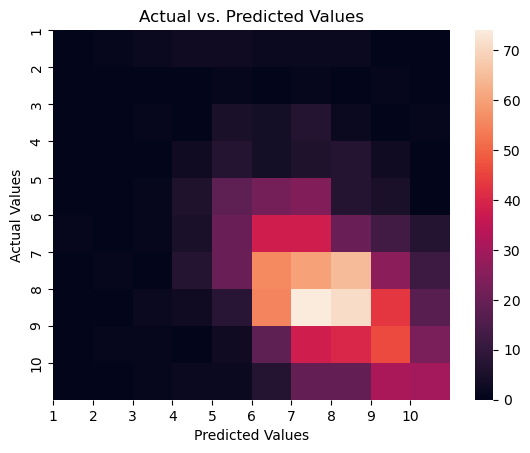

In [3]:
val_results = rec.validation_comparison(plot=True)

In [8]:
# if either a movie or a user is not in our training data, we can't make a
# prediction with our trained FunkSVD model and a ValueError is raised
pred = rec.predict_rating(5211, 1663662)

ValueError: User or movie is not in training data and thus no prediction can be made

In [9]:
print(val_results["rmse"], val_results["perc_rated"])

1.8545982141762418 0.5475


In [10]:
# create dictionary with user id's and recommendations
res_dict = {}
for usr in rec.val_df["user_id"]:
    res_dict[usr] = rec.make_recs(usr, id_type="user")

In [11]:
num_vals = []
for key in res_dict.keys():
    num_vals.append(len(res_dict[key]))

np.unique(num_vals, return_counts=True)

(array([5]), array([569]))

In [13]:
res_dict

{5551: ['Memento (2000)',
  'The Fall (2006)',
  'Star Trek Into Darkness (2013)',
  'Jiro Dreams of Sushi (2011)',
  'Mud (2012)'],
 6410: ['The Green Mile (1999)',
  'The Fall (2006)',
  'WALL·E (2008)',
  'Jiro Dreams of Sushi (2011)',
  'The Sessions (2012)'],
 3251: ['The Green Mile (1999)',
  'The Fall (2006)',
  'WALL·E (2008)',
  'Jiro Dreams of Sushi (2011)',
  'Mud (2012)'],
 2894: ['Dark City (1998)',
  'National Treasure (2004)',
  'The Fall (2006)',
  'Mud (2012)',
  'Searching for Sugar Man (2012)'],
 2625: ['Memento (2000)',
  'The Fall (2006)',
  'Iron Man Three (2013)',
  'Django Unchained (2012)',
  'Mud (2012)'],
 3593: ['Memento (2000)',
  'WALL·E (2008)',
  'Django Unchained (2012)',
  'Mud (2012)',
  'Olympus Has Fallen (2013)'],
 5490: ['The Fall (2006)',
  'The Perks of Being a Wallflower (2012)',
  'Jiro Dreams of Sushi (2011)',
  'The Sessions (2012)',
  'Mud (2012)'],
 1837: ['Memento (2000)',
  'The Hobbit: An Unexpected Journey (2012)',
  'WALL·E (2008)',
 